<a href="https://colab.research.google.com/github/gkarthick510/Project/blob/main/Netflix_Data_Cleaning%2C_Analysis_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [391]:
import pandas as pd
import numpy as np

In [392]:
data=pd.read_csv("/content/drive/MyDrive/netflix1.csv")
data.tail()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV
8789,s8786,TV Show,YOM,Not Given,Pakistan,6/7/2018,2016,TV-Y7,1 Season,Kids' TV


In [393]:
data.shape

(8790, 10)

In [394]:
data.drop_duplicates().head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [395]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [396]:
data.shape

(8790, 10)

In [397]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [398]:
data["date_added"]=(data["date_added"].astype('datetime64'))

In [399]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


In [400]:
data.drop(['show_id'],axis=1,inplace=True)

In [401]:
data['date_added']=pd.DatetimeIndex(data['date_added']).year


In [402]:
data.columns

Index(['type', 'title', 'director', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in'],
      dtype='object')

In [403]:
data["director"].value_counts()

Not Given                         2588
Rajiv Chilaka                       20
Alastair Fothergill                 18
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
                                  ... 
Matt D'Avella                        1
Parthiban                            1
Scott McAboy                         1
Raymie Muzquiz, Stu Livingston       1
Mozez Singh                          1
Name: director, Length: 4528, dtype: int64

In [404]:
g=data.groupby(['country','type'])['title'].count().sort_values().reset_index(name='count')
g

,country,type,count
0,Zimbabwe,Movie,1
1,Cyprus,TV Show,1
2,Czech Republic,TV Show,1
3,Soviet Union,Movie,1
4,Somalia,Movie,1
...,...,...,...
133,Pakistan,TV Show,350
134,United Kingdom,Movie,387
135,United States,TV Show,845
136,India,Movie,976


In [405]:
g

,country,type,count
0,Zimbabwe,Movie,1
1,Cyprus,TV Show,1
2,Czech Republic,TV Show,1
3,Soviet Union,Movie,1
4,Somalia,Movie,1
...,...,...,...
133,Pakistan,TV Show,350
134,United Kingdom,Movie,387
135,United States,TV Show,845
136,India,Movie,976


In [406]:
#o= data[data.director=="Not Given"].index
#o.shape

In [407]:
#data=data.drop(o)

In [408]:
data.shape

(8790, 9)

In [409]:
data.describe()

,date_added,release_year
count,8790.000000,8790.000000
mean,2018.873606,2014.183163
std,1.573568,8.825466
min,2008.000000,1925.000000
25%,2018.000000,2013.000000
50%,2019.000000,2017.000000
75%,2020.000000,2019.000000
max,2021.000000,2021.000000


In [410]:
data['type'].value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

In [411]:
data['country'].value_counts()

United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: country, Length: 86, dtype: int64

In [412]:
data['date_added'].value_counts()

2019    2016
2020    1879
2018    1648
2021    1498
2017    1185
2016     426
2015      82
2014      24
2011      13
2013      11
2012       3
2009       2
2008       2
2010       1
Name: date_added, dtype: int64

In [413]:
data['release_year'].value_counts()

2018    1146
2017    1030
2019    1030
2020     953
2016     901
        ... 
1966       1
1959       1
1925       1
1947       1
1961       1
Name: release_year, Length: 74, dtype: int64

In [414]:
data['rating'].value_counts()

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

In [415]:
data['duration'].value_counts()

1 Season      1791
2 Seasons      421
3 Seasons      198
90 min         152
97 min         146
              ... 
5 min            1
16 min           1
186 min          1
193 min          1
11 Seasons       1
Name: duration, Length: 220, dtype: int64

In [416]:
data['listed_in'].value_counts()

Dramas, International Movies                                362
Documentaries                                               359
Stand-Up Comedy                                             334
Comedies, Dramas, International Movies                      274
Dramas, Independent Movies, International Movies            252
                                                           ... 
Anime Features                                                1
Action & Adventure, Horror Movies, Independent Movies         1
Action & Adventure, Classic Movies, International Movies      1
Cult Movies, Independent Movies, Thrillers                    1
Classic & Cult TV, Crime TV Shows, TV Dramas                  1
Name: listed_in, Length: 513, dtype: int64

In [417]:
b=data.groupby(["type","rating"])["rating"].count().sort_values().reset_index(name='o')
b.head()

,type,rating,o
0,TV Show,TV-Y7-FV,1
1,TV Show,R,2
2,Movie,NC-17,3
3,Movie,UR,3
4,TV Show,NR,4


In [418]:
data1= data[data.type=="TV Show"]

In [419]:
data1.shape

(2664, 9)

In [420]:
data2=data[data.type=="Movie"]

In [421]:
data2.shape

(6126, 9)

In [422]:
#data=pd.get_dummies(data,columns=["type"])

In [423]:
#b0=data0.groupby(["type_Movie","date_added"])["date_added"].value_counts()
b0

type_Movie  date_added  release_year
0           2008        2007            1
            2013        2013            2
                        2007            1
                        2012            1
                        2016            1
                                       ..
1           2021        1972            1
                        1973            1
                        1975            1
                        1978            1
                        1985            1
Name: release_year, Length: 468, dtype: int64

In [424]:
#data.rename(columns={"type_TV Show":"type_TV_Show"},inplace=True)

In [425]:
#s=data[data.type_Movie== 0].index
#alty=data.drop(s)

In [426]:
#A=data[data.type_TV_Show== 0].index
#alt=data.drop(A)

In [427]:
#with_type_Movie=alty.groupby(["rating","type_Movie"])['type_Movie'].count().sort_values().reset_index(name="new")
#with_type_Movie.head()

In [428]:
#with_type_TV_Show=alt.groupby(["rating","type_TV_Show"])['type_TV_Show'].count().sort_values().reset_index(name='n')
#with_type_TV_Show.head()

In [429]:
data.columns

Index(['type', 'title', 'director', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in'],
      dtype='object')

#visualization

In [430]:
import matplotlib.pyplot as plt
import seaborn as sns 

Text(0.5, 0, 'Release Year')

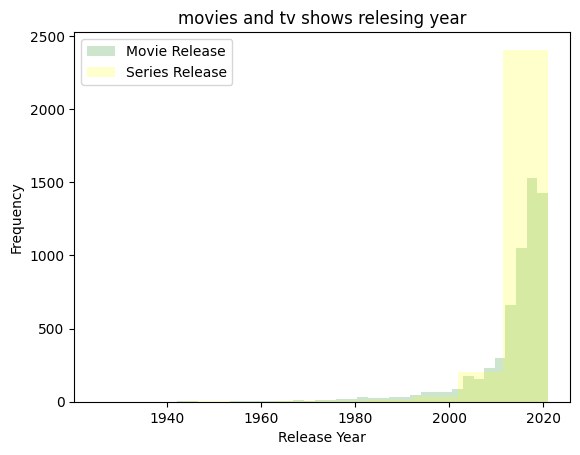

In [431]:
#sns.set_style("whitegrid")
#plt.figure(figsize=(12, 8))
data[data.type=='Movie'].release_year.plot(bins=35, kind='hist', color='green', 
                                       label='Movie Release', alpha=0.2)
data[data.type=='TV Show'].release_year.plot(kind='hist', color='yellow', 
                                       label='Series Release', alpha=0.2)
plt.legend()
plt.title("movies and tv shows relesing year")
plt.xlabel("Release Year")

Text(0.5, 1.0, 'Movies--Tv Shows')

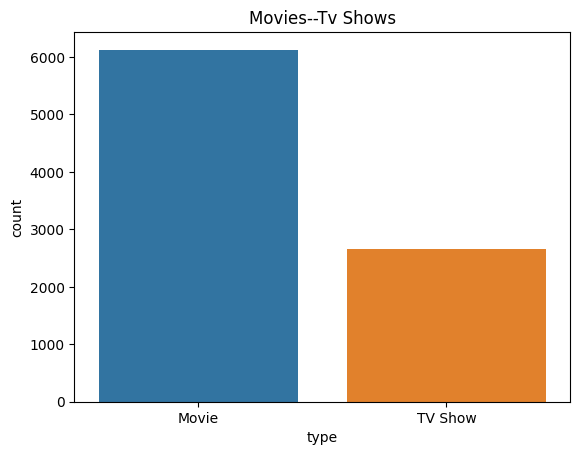

In [432]:
sns.countplot(data=data,x='type')
plt.title('Movies--Tv Shows')

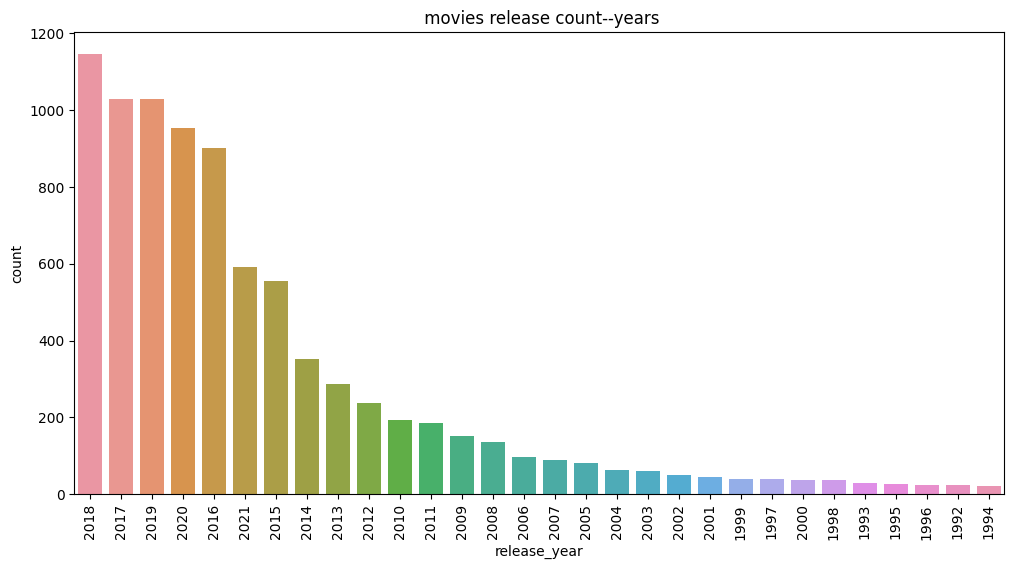

In [433]:
plt.figure(figsize=(12,6))
sns.countplot(x='release_year', data=data, order=data['release_year'].value_counts().index[:30])
plt.xticks(rotation=90)
plt.title(" movies release count--years")
plt.show()

Text(0.5, 1.0, 'movies added in netflix(year)')

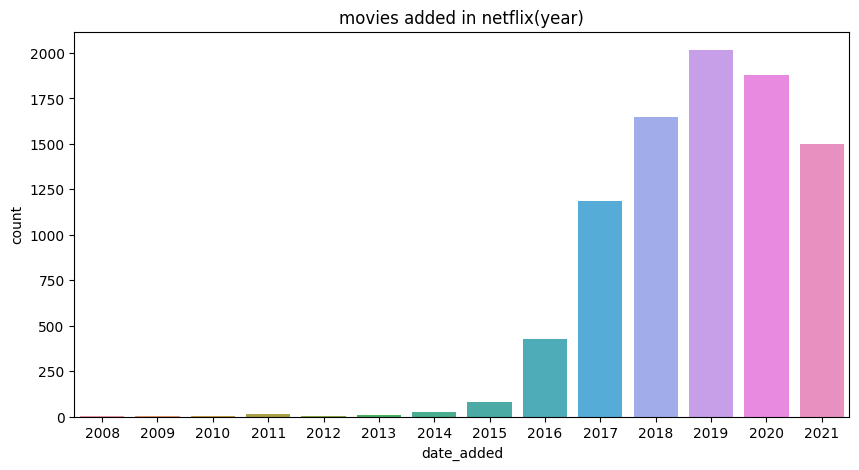

In [434]:
plt.figure(figsize=(10,5))
sns.countplot(x="date_added",data=data)
plt.title("movies added in netflix(year)")

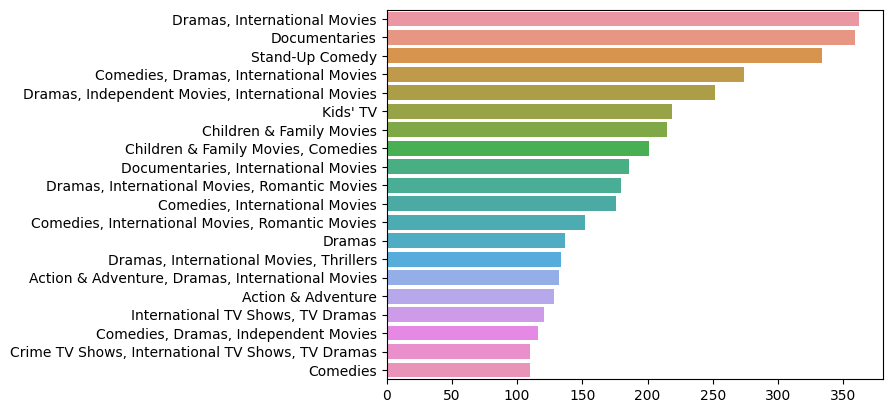

In [435]:
df = data['listed_in'].value_counts().head(20)
count = sns.barplot(y= df.index, x=df.values )

Text(0.5, 1.0, 'countries')

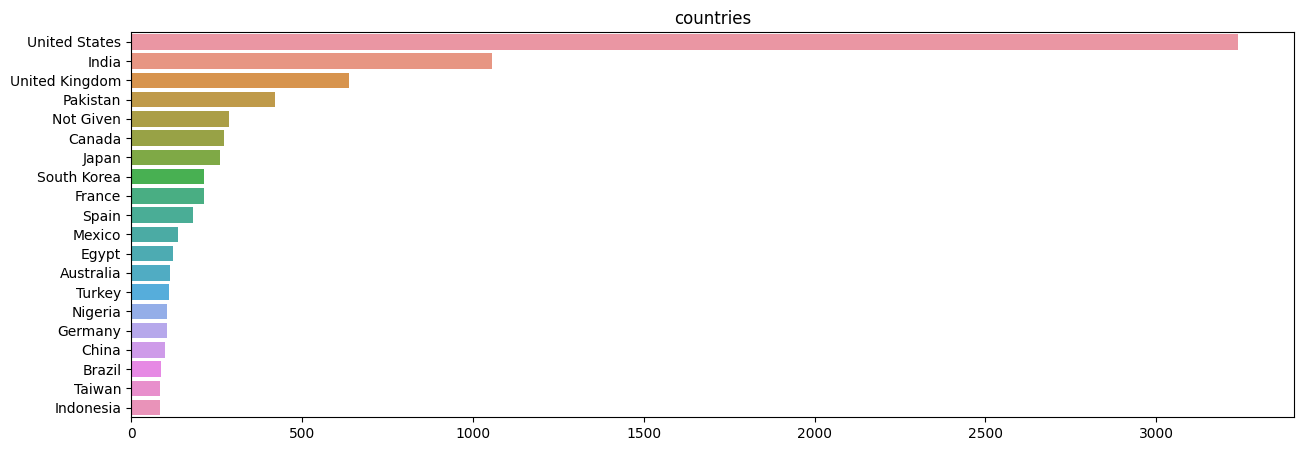

In [436]:
plt.figure(figsize=(15,5))
d= data['country'].value_counts().head(20)
count = sns.barplot(y= d.index, x=d.values )
plt.title("countries")
#plt.xticks(rotation=90)

<Axes: xlabel='date_added', ylabel='listed_in'>

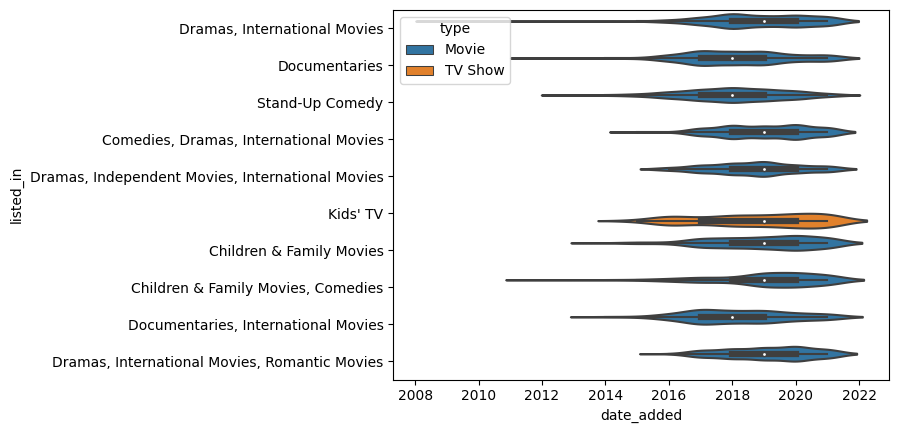

In [437]:
sns.violinplot(data=data,x="date_added",y="listed_in",hue="type", order=data['listed_in'].value_counts().index[:10])

Text(0.5, 1.0, 'Ratings')

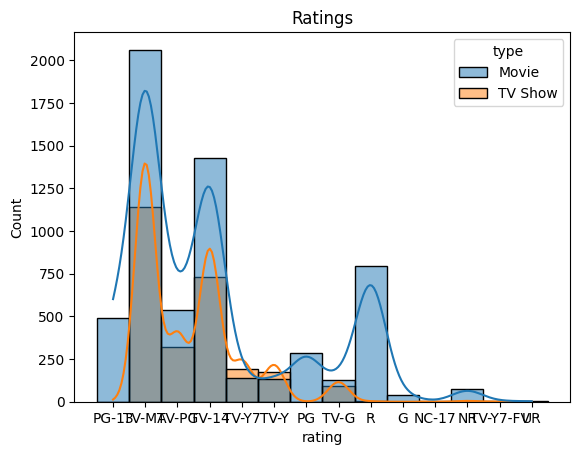

In [438]:
sns.histplot(data=data,x='rating',hue='type',stat='count',kde=True)
plt.title("Ratings")

Text(0.5, 1.0, 'Ratings with year')

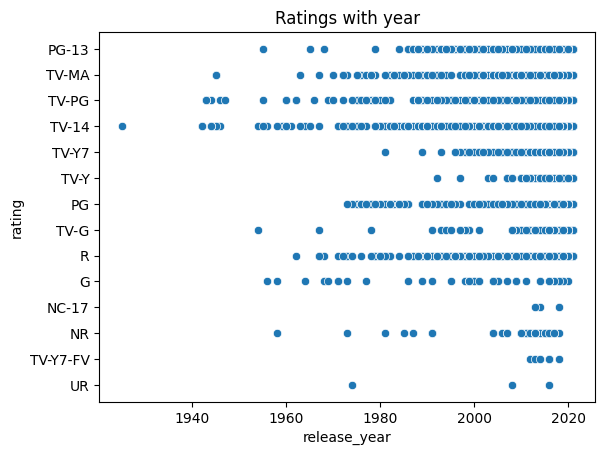

In [439]:
sns.scatterplot(x='release_year',y='rating',data=data)
plt.title("Ratings with year")

Text(0.5, 1.0, 'Boxen Plot for release_year')

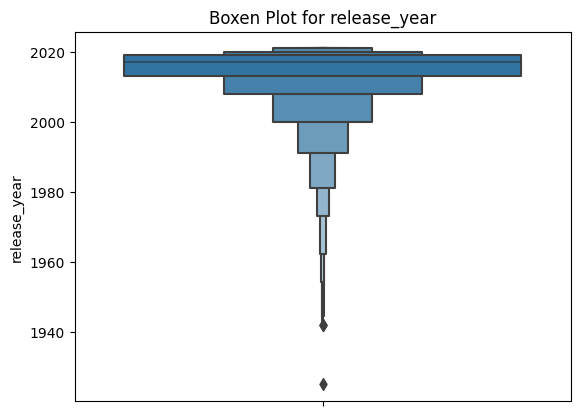

In [440]:
sns.boxenplot(y = data['release_year'])
plt.title("Boxen Plot for release_year")

In [441]:
data.country.nunique()

86

Duration with country

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85],
 [Text(0, 0, 'United States'),
  Text(1, 0, 'France'),
  Text(2, 0, 'Brazil'),
  Text(3, 0, 'United Kingdom'),
  Text(4, 0, 'India'),
  Text(5, 0, 'Germany'),
  Text(6, 0, 'Pakistan'),
  Text(7, 0, 'Not Given'),
  Text(8, 0, 'China'),
  Text(9, 0, 'South Africa'),
  Text(10, 0, 'Japan'),
  Text(11, 0, 'Nigeria'),
  Text(12, 0, 'Spain'),
  Text(13, 0, 'Philippines'),
  Text(14, 0, 'Australia'),
  Text(15, 0, 'Argentina'),
  Text(16, 0, 'Canada'),
  Text(17, 0, 'Hong Kong'),
  Text(18, 0, '

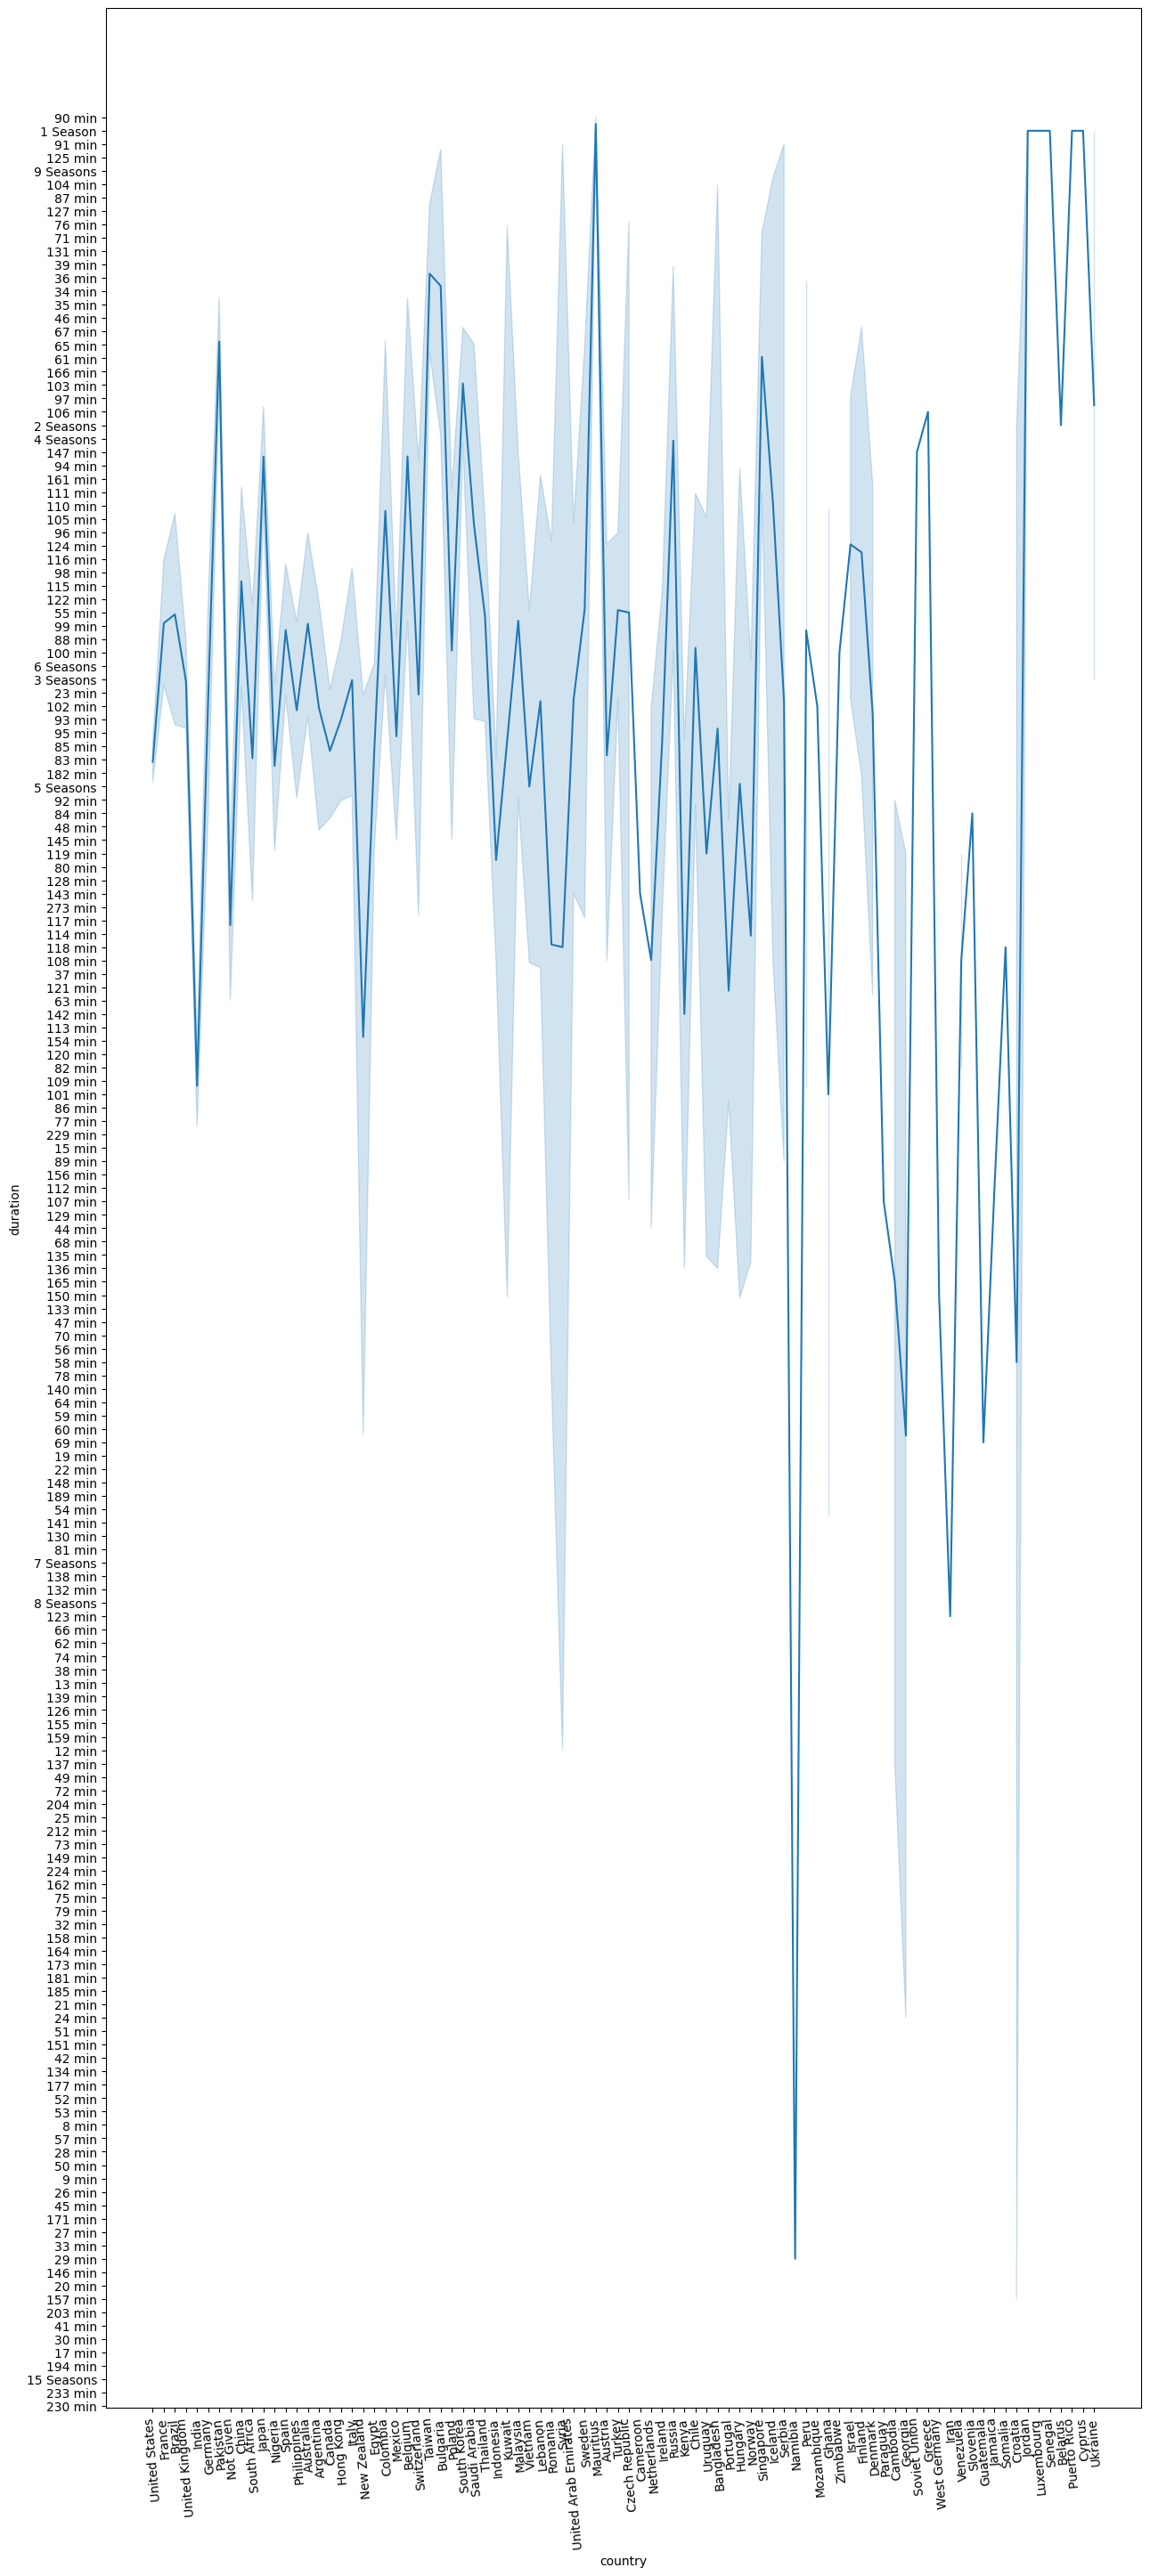

In [442]:
plt.figure(figsize=(15,35))
sns.lineplot(x='country',y='duration',data=data)
plt.xticks(rotation=95)


Text(0.5, 1.0, 'Duration')

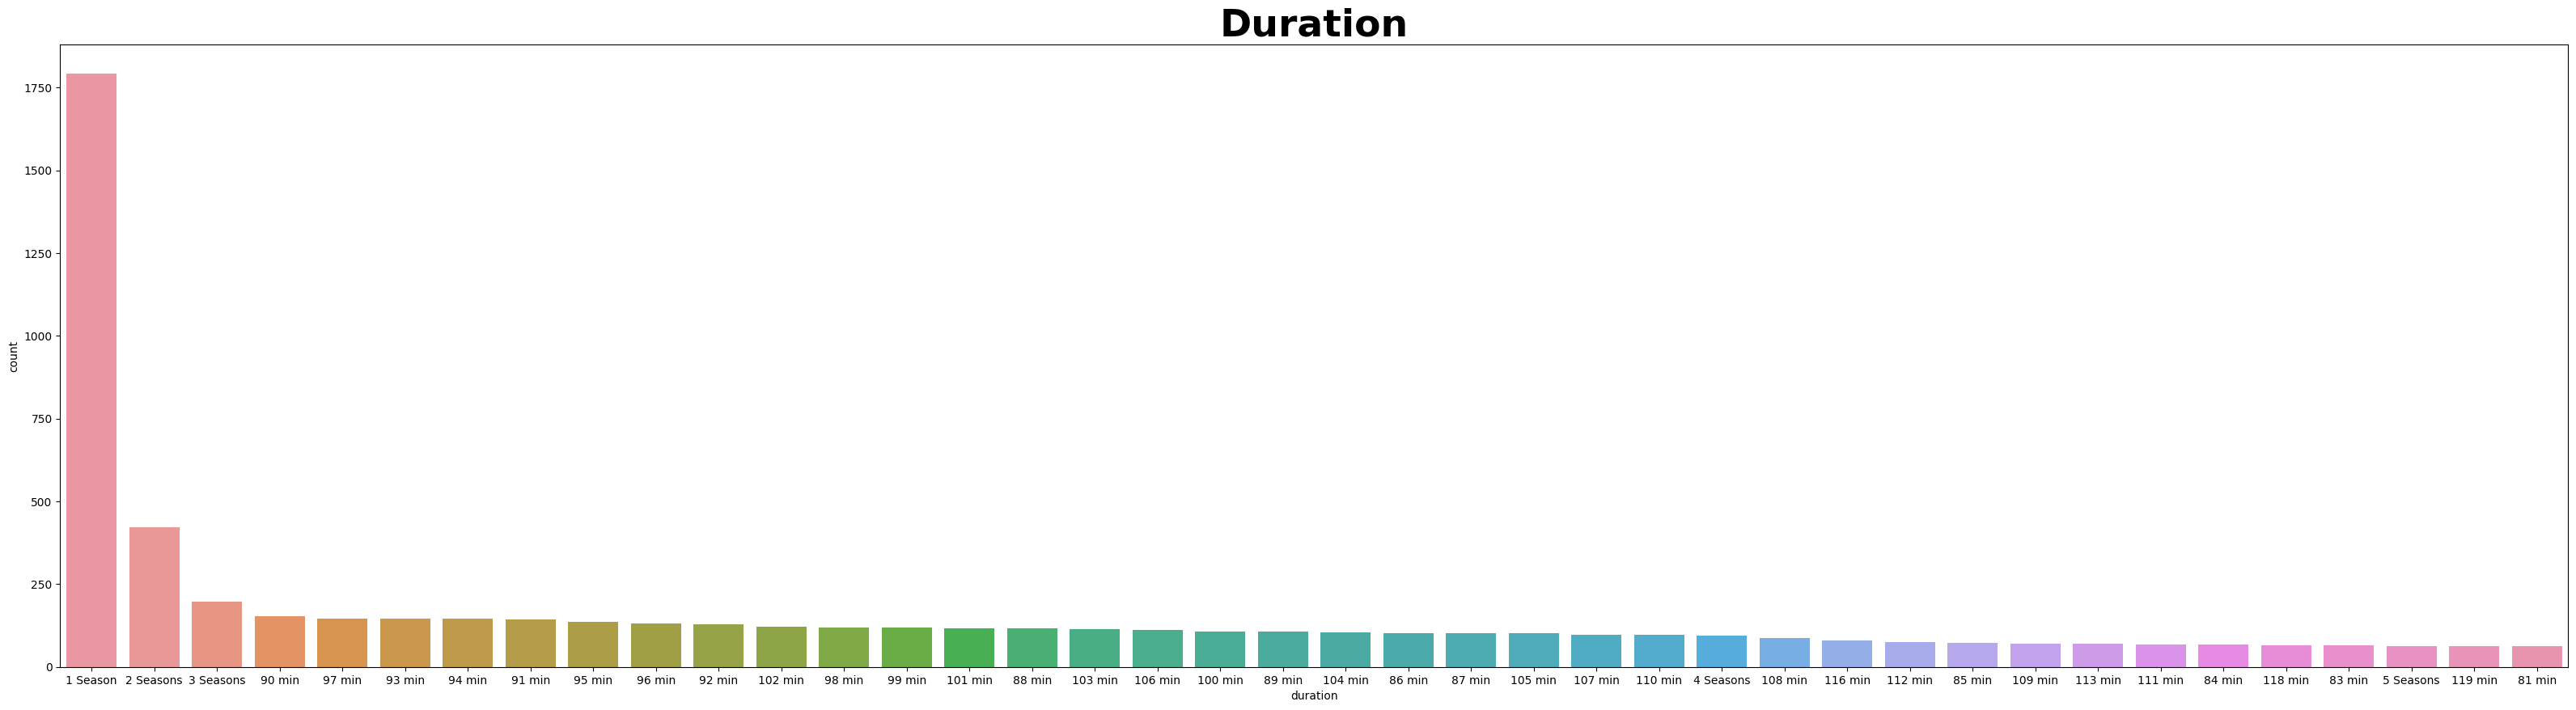

In [443]:
plt.figure(figsize=(40,10))
sns.countplot(data=data,x='duration',order=data['duration'].value_counts().index[:40])
plt.title("Duration",fontsize = 34, fontweight = 'heavy')


* Compare to TV Show Movie type count is higher
* TV-MA (Mature Audience Only) and TV-14 top ratings in Netflix Dataset -3205
* United States had highest no of shows--3240
* Top Genres are: Dramas, International Movies, Documentaries, and Stand-Up Comedy
* In the year of 2019 totally 2016 movies[1424] and Tv shows[592] added in netflix[ highest count of movies added in a year]